<h1><center>Decision Trees: Drug Prescription using Historical data of Patients.</center></h1>

In this project we used a classification algorithm to predict the response of a group of patients to different medications using historical data. For this, we worked training a decision tree model to predict the class of a unknown patient, or to find a proper drug for a new one.

## Initial Setup

In [5]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## Dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>


In [6]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"

In [37]:
df = pd.read_csv(path, delimiter=",")
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
df.shape

(200, 6)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>df</b> as the Drug.csv data read by pandas, let's declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [9]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

## Label Encoding

Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__

In [10]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(df.Sex) 

In [11]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [12]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [13]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [14]:
y = df.Drug
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<h2>Setting up the Decision Tree</h2>

We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
print(X_trainset.shape, y_trainset.shape)
print(X_testset.shape, y_testset.shape)

(140, 5) (140,)
(60, 5) (60,)


<h2>Modeling</h2>

We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [19]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2>Prediction</h2>

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [20]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [21]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<h2>Evaluation</h2>

Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


 **Can you calculate the accuracy score without sklearn.**

In [30]:
# your code here
predTree=np.array(predTree)
y_testset=np.array(y_testset)

In [31]:
count=0
for idx, j in np.ndenumerate(predTree):
    if predTree[idx]==y_testset[idx] :
        count=count+1
div=predTree.shape[0]
count/div

0.9833333333333333

<h2>Visualization</h2>

Lets visualize the tree


In [ ]:
from sklearn import tree

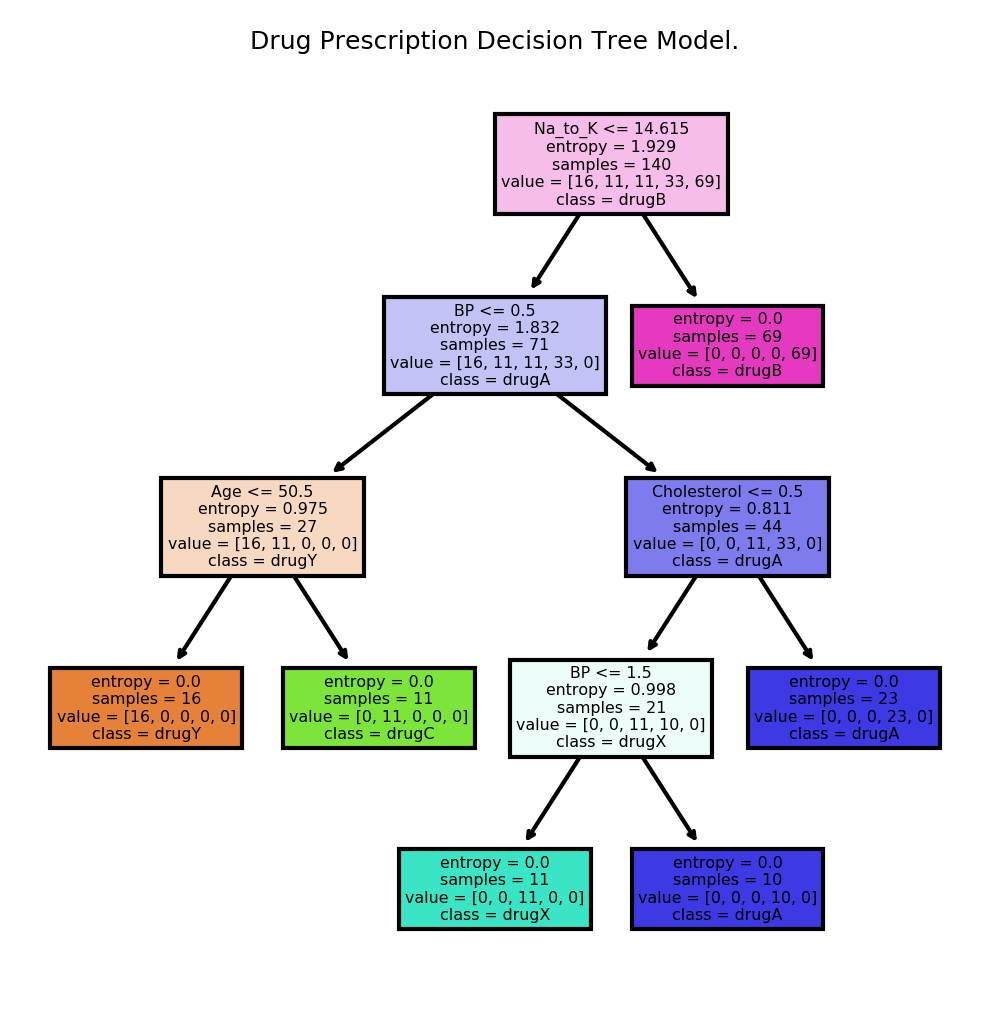

In [47]:
fn=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
cn=['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4),dpi=300)
tree.plot_tree(drugTree,
               feature_names = fn, 
               class_names=cn,
               filled = True)
axes.set_title("Drug Prescription Decision Tree Model.",fontdict={'fontsize': 6, 'fontweight': 'medium'})
fig.savefig('img/dt_sample.png')
plt.show()


## Reference

**Dr. Saeed Aghabozorgi**, Machine Learning IBM Cognitive Class